# Trial 1 with default params

## Loading Modules

In [2]:
from sklearn import tree
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


## Loading Data

In [3]:
df = pd.read_csv("../processed.csv")
df

,Initial_Price,Final_Price,Win_Flag,Mac_Flag,Linux_Flag,Positive_Reviews,Negative_Reviews,Memory_MB,Storage_MB,target
0,52.0,52.0,True,True,False,57.0,7.0,1024,50,1
1,0.0,0.0,True,True,False,53.0,6.0,2048,3072,1
2,0.0,0.0,True,False,False,133.0,69.0,2048,100,0
3,530.0,530.0,True,False,False,22.0,9.0,2048,500,0
4,229.0,229.0,True,True,True,226.0,44.0,2048,1500,1
...,...,...,...,...,...,...,...,...,...,...
57467,85.0,85.0,True,False,False,0.0,4.0,4096,200,-1
57468,349.0,349.0,True,True,False,2.0,1.0,1024,1024,1
57469,164.0,164.0,True,False,False,8.0,1.0,4096,20480,1
57470,610.0,610.0,True,False,False,1.0,0.0,4096,3072,1


## Splitting Data 33% test and 66% train

In [4]:
y = df["target"]
X = df.drop(labels=["target"],axis=1)


X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.33, random_state=100,shuffle=True)


## Building model

In [5]:
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)


DecisionTreeClassifier()

## Model evaluation

In [6]:
preds = dt.predict(X_test)
accuracy_score(y_test,preds)

0.8972371612358958

## Important metrics

In [7]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          -1       0.77      0.79      0.78      2123
           0       0.79      0.80      0.79      3563
           1       0.95      0.94      0.94     13280

    accuracy                           0.90     18966
   macro avg       0.84      0.84      0.84     18966
weighted avg       0.90      0.90      0.90     18966



## Confusion Matrix Display

In [8]:
confusion_matrix(y_test, preds)

array([[ 1678,   234,   211],
       [  234,  2836,   493],
       [  260,   517, 12503]], dtype=int64)

## Plotting Tree

Text(1.0, 0.25, 'ccp_alpha: 0.0\nclass_weight: None\ncriterion: gini\nmax_depth: None\nmax_features: None\nmax_leaf_nodes: None\nmin_impurity_decrease: 0.0\nmin_samples_leaf: 1\nmin_samples_split: 2\nmin_weight_fraction_leaf: 0.0\nmonotonic_cst: None\nrandom_state: None\nsplitter: best')

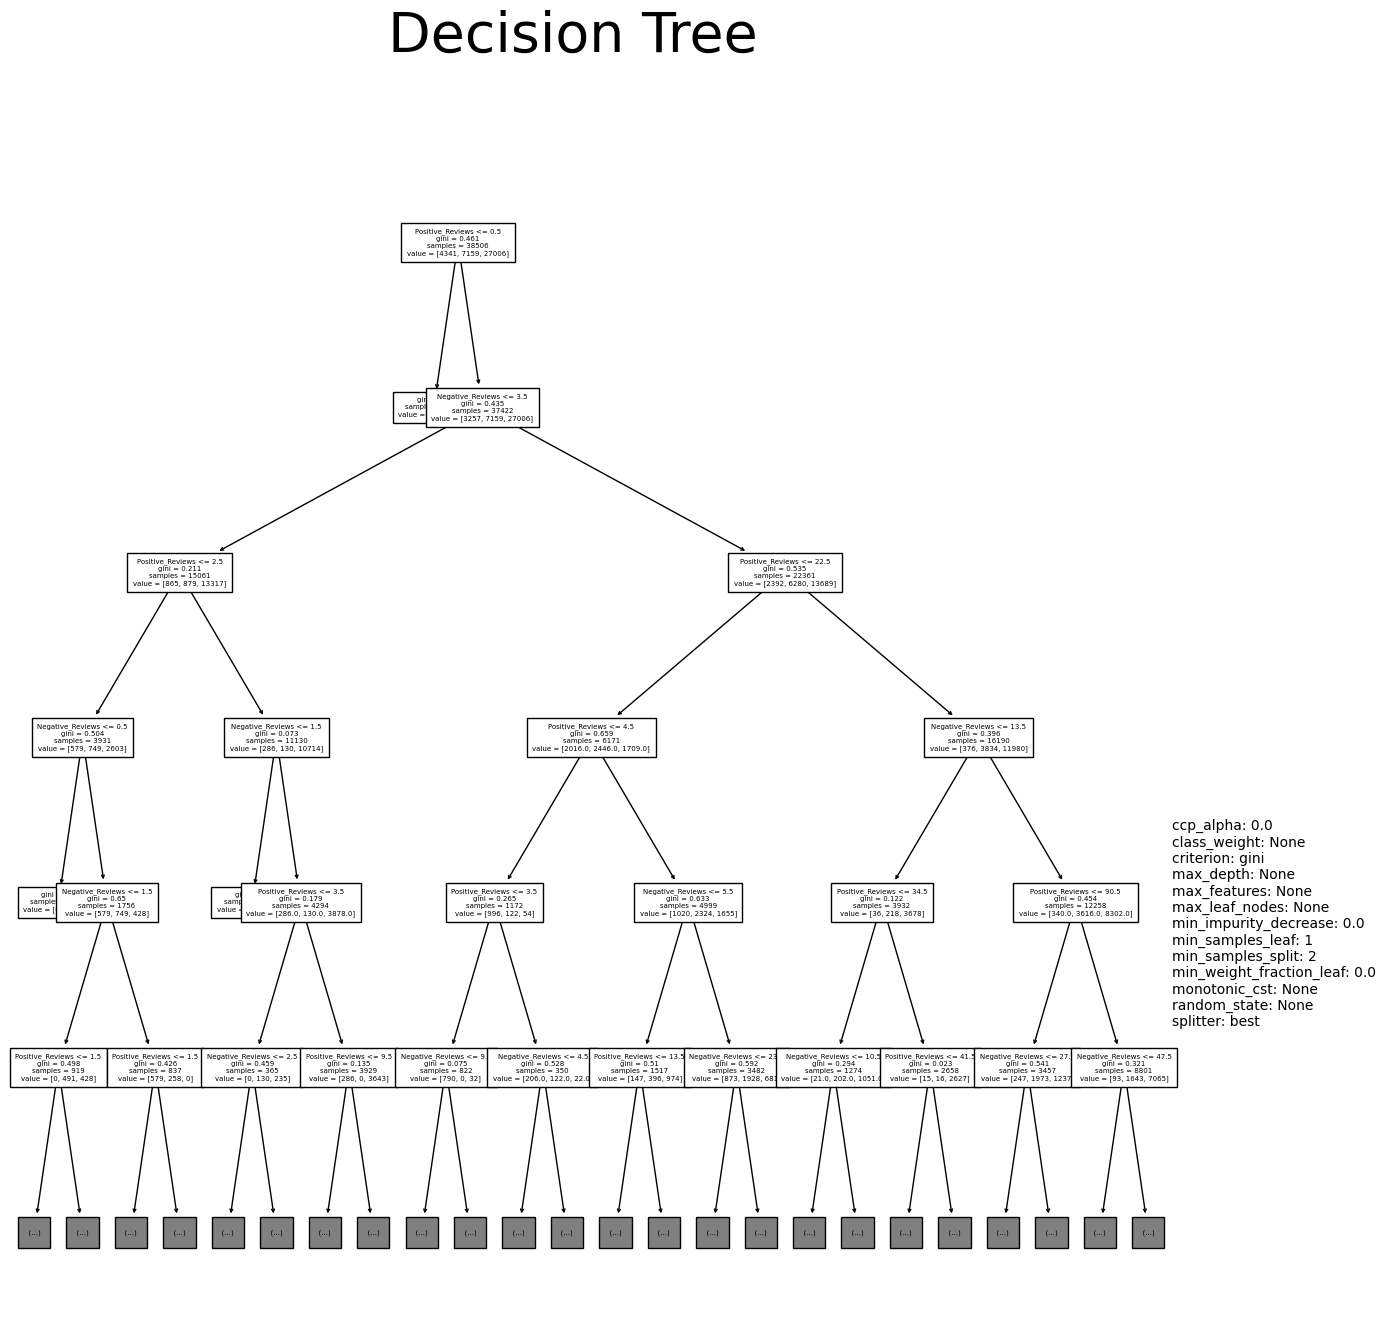

In [12]:
fig=tree.plot_tree(dt,max_depth=5, feature_names=dt.feature_names_in_, 
                   fontsize=5)[0].figure
fig.set_size_inches(15, 15)
fig.suptitle("Decision Tree", fontsize=40)
hp_text = '\n'.join(f"{k}: {v}" for k, v in dt.get_params().items())
fig.text(1.0, 0.25, hp_text, transform=fig.gca().transAxes)

### Displaying  Tree info

In [ ]:
dt.get_n_leaves()

3228

In [ ]:
dt.get_depth()

34

### Conclusion
1. Decision Tree fitting got accuracy of 89% on test data which is more than KNN or bayes
2. By far most effective for this data